In [1]:
import memo_py as me
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
import scipy.stats as stats
from scipy import integrate
import pymc3
%matplotlib inline

/Users/mlanghinrichs/Documents/Studium/MSc/09_hiwi_hoefer/01_project/memo_py/memo_py/selection.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


##### parallel 2 model

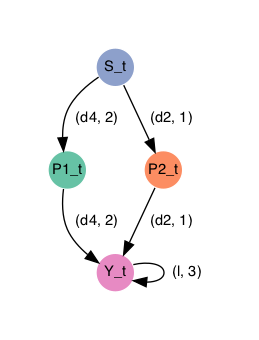

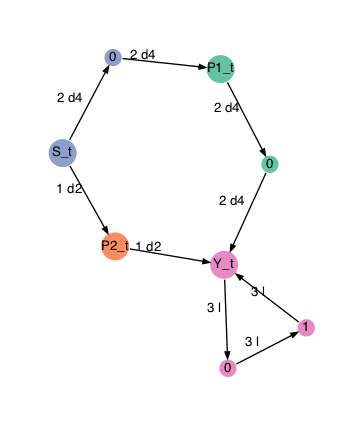

In [2]:
# a parallel 2 model with the current P helper node implementation
t = [
    {'start': 'S_t', 'end': 'P1_t', 'rate_symbol': 'd4', 'type': 'S -> E', 'reaction_steps': int(4/2)},
    {'start': 'P1_t', 'end': 'Y_t', 'rate_symbol': 'd4', 'type': 'S -> E', 'reaction_steps': int(4/2)},

    {'start': 'S_t', 'end': 'P2_t', 'rate_symbol': 'd2', 'type': 'S -> E', 'reaction_steps': int(2/2)},
    {'start': 'P2_t', 'end': 'Y_t', 'rate_symbol': 'd2', 'type': 'S -> E', 'reaction_steps': int(2/2)},

    {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'l', 'type': 'S -> S + S', 'reaction_steps': 3}
    ]

netp = me.Network('net_p_helper')
netp.structure(t)

me.plots.net_main_plot(netp)
me.plots.net_hidden_plot(netp)

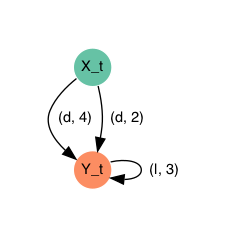

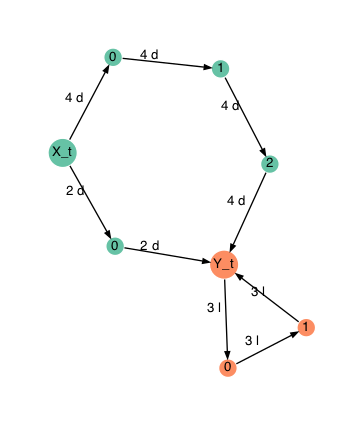

In [3]:
# multigraph version (not yet implemented; seems to work on hidden layer but not on main layer image)
t = [
    {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd', 'type': 'S -> E', 'reaction_steps': 4},
    {'start': 'X_t', 'end': 'Y_t', 'rate_symbol': 'd', 'type': 'S -> E', 'reaction_steps': 2},
    {'start': 'Y_t', 'end': 'Y_t', 'rate_symbol': 'l', 'type': 'S -> S + S', 'reaction_steps': 3}
    ]

netm = me.Network('net_multiedges')
netm.structure(t)

me.plots.net_main_plot(netm)
me.plots.net_hidden_plot(netm)

In [4]:
netm.net_modules

[{'module': 'module_0',
  'start-end': ('X_t', 'Y_t'),
  'start-end_ident': ('Z_0', 'Z_1'),
  'sym_rate': 'd',
  'sym_rate_ident': 'theta_0',
  'type': 'S -> E',
  'module_steps': 4},
 {'module': 'module_1',
  'start-end': ('X_t', 'Y_t'),
  'start-end_ident': ('Z_0', 'Z_1'),
  'sym_rate': 'd',
  'sym_rate_ident': 'theta_0',
  'type': 'S -> E',
  'module_steps': 2},
 {'module': 'module_2',
  'start-end': ('Y_t', 'Y_t'),
  'start-end_ident': ('Z_1', 'Z_1'),
  'sym_rate': 'l',
  'sym_rate_ident': 'theta_1',
  'type': 'S -> S + S',
  'module_steps': 3}]

In [5]:
netm.net_main.edges() # (data=True)
# here we miss one edge
# OutEdgeView([('Z_0', 'Z_1'), ('Z_1', 'Z_1')])

OutMultiEdgeDataView([('Z_0', 'Z_1'), ('Z_0', 'Z_1'), ('Z_1', 'Z_1')])

In [6]:
netm.net_hidden.edges()

OutMultiEdgeDataView([('Z_0__centric', 'Z_0__module_0__0'), ('Z_0__centric', 'Z_0__module_1__0'), ('Z_0__module_0__0', 'Z_0__module_0__1'), ('Z_0__module_0__1', 'Z_0__module_0__2'), ('Z_0__module_0__2', 'Z_1__centric'), ('Z_1__centric', 'Z_1__module_2__0'), ('Z_0__module_1__0', 'Z_1__centric'), ('Z_1__module_2__0', 'Z_1__module_2__1'), ('Z_1__module_2__1', 'Z_1__centric')])

##### multi Markov rates

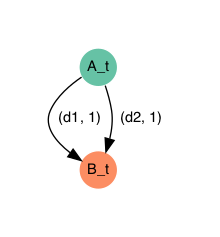

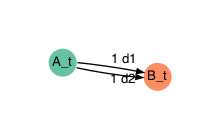

In [35]:
t = [
    {'start': 'A_t', 'end': 'B_t', 'rate_symbol': 'd1', 'type': 'S -> E', 'reaction_steps': 1},
    {'start': 'A_t', 'end': 'B_t', 'rate_symbol': 'd2', 'type': 'S -> E', 'reaction_steps': 1},
    ]

netmarkov = me.Network('net_d2_markov')
netmarkov.structure(t)

me.plots.net_main_plot(netmarkov)
me.plots.net_hidden_plot(netmarkov)

In [36]:
netmarkov.net_main.edges() # (data=True)
# here we miss one edge
# OutEdgeView([('Z_0', 'Z_1')])

OutMultiEdgeDataView([('Z_0', 'Z_1'), ('Z_0', 'Z_1')])

In [37]:
netmarkov.net_main.edges(data=True)

OutMultiEdgeDataView([('Z_0', 'Z_1', {'module_start_end_identifier': ('Z_0', 'Z_1'), 'module_start_end': ('A_t', 'B_t'), 'module_rate_symbol_identifier': 'theta_0', 'module_rate_symbol': 'd1', 'module_identifier': 'module_0', 'module_type': 'S -> E', 'module_steps': 1}), ('Z_0', 'Z_1', {'module_start_end_identifier': ('Z_0', 'Z_1'), 'module_start_end': ('A_t', 'B_t'), 'module_rate_symbol_identifier': 'theta_1', 'module_rate_symbol': 'd2', 'module_identifier': 'module_1', 'module_type': 'S -> E', 'module_steps': 1})])

In [38]:
netmarkov.net_hidden.edges() # (data=True)
# here we miss one edge
# OutEdgeView([('Z_0__centric', 'Z_1__centric')])

OutMultiEdgeDataView([('Z_0__centric', 'Z_1__centric'), ('Z_0__centric', 'Z_1__centric')])

In [39]:
netmarkov.net_hidden.edges(data=True)

OutMultiEdgeDataView([('Z_0__centric', 'Z_1__centric', {'edge_start_end_identifier': ('Z_0__centric', 'Z_1__centric'), 'edge_centric_start_end_identifier': ('Z_0__centric', 'Z_1__centric'), 'module_start_end_identifier': ('Z_0', 'Z_1'), 'module_start_end': ('A_t', 'B_t'), 'edge_rate_symbol_identifier': '1.0 * theta_0', 'edge_rate_symbol': '1.0 * d1', 'module_rate_symbol_identifier': 'theta_0', 'module_rate_symbol': 'd1', 'module_identifier': 'module_0', 'edge_type': 'S -> E', 'module_type': 'S -> E', 'module_steps': 1}), ('Z_0__centric', 'Z_1__centric', {'edge_start_end_identifier': ('Z_0__centric', 'Z_1__centric'), 'edge_centric_start_end_identifier': ('Z_0__centric', 'Z_1__centric'), 'module_start_end_identifier': ('Z_0', 'Z_1'), 'module_start_end': ('A_t', 'B_t'), 'edge_rate_symbol_identifier': '1.0 * theta_1', 'edge_rate_symbol': '1.0 * d2', 'module_rate_symbol_identifier': 'theta_1', 'module_rate_symbol': 'd2', 'module_identifier': 'module_1', 'edge_type': 'S -> E', 'module_type':

In [40]:
netmarkov.net_theta_symbolic
# here we see both thetas, but one is missing from edges view!

['theta_0', 'theta_1']

In [41]:
netmarkov.net_rates_identifier

{'theta_0': 'd1', 'theta_1': 'd2'}

In [43]:
variables = {'A_t': ('A_t',), 'B_t': ('B_t',)}
initial_values = {'A_t': 1, 'B_t': 2}
theta_values = {'d1': 1.0, 'd2': 1.0} # {'d': 1.0} 
time_values = np.array([0.0, 1.0])

sim = me.Simulation(netmarkov)
sim.simulate('moments', variables, initial_values, theta_values, time_values)

(array([[1.        , 0.13533528],
        [2.        , 2.86466472]]),
 array([[0.        , 0.11701964],
        [0.        , 0.11701964]]),
 array([[ 0.        , -0.11701964]]))

In [52]:
sim = me.Simulation(netmarkov)
sim.simulate('gillespie', variables, initial_values, theta_values, time_values)

[array([0., 1.]),
 array([[1., 0.],
        [2., 3.]])]

In [44]:
sim.sim_moments.moment_order_hidden

[[('Z_0__centric',), ('Z_1__centric',)],
 [('Z_0__centric', 'Z_0__centric'),
  ('Z_0__centric', 'Z_1__centric'),
  ('Z_1__centric', 'Z_1__centric')]]

In [45]:
sim.sim_moments.moment_eqs
# we can see that theta_0 reactions are missing!
# ['-1.0*m[0]*theta[1]',
#  '1.0*m[0]*theta[1]',
#  '-2.0*m[2]*theta[1]',
#  '1.0*m[2]*theta[1] - 1.0*m[3]*theta[1]',
#  '2.0*m[3]*theta[1]']

['-1.0*m[0]*theta[0] - 1.0*m[0]*theta[1]',
 '1.0*m[0]*theta[0] + 1.0*m[0]*theta[1]',
 '-2.0*m[2]*theta[0] - 2.0*m[2]*theta[1]',
 '1.0*m[2]*theta[0] + 1.0*m[2]*theta[1] - 1.0*m[3]*theta[0] - 1.0*m[3]*theta[1]',
 '2.0*m[3]*theta[0] + 2.0*m[3]*theta[1]']

##### networkx DiGraph test

In [17]:
import networkx as nx

In [18]:
nx.__version__

'2.4'

In [19]:
# current digraph version
G = nx.DiGraph()
G.add_edge(1, 2, info='hi1')
G.add_edge(1, 2, info='hi2')
print(G.edges(data=True))
print(G.edges())

[(1, 2, {'info': 'hi2'})]
[(1, 2)]


In [20]:
print(sorted(G.edges(data=True)))
print(G[1])

[(1, 2, {'info': 'hi2'})]
{2: {'info': 'hi2'}}


In [21]:
G.edges(1,2)

OutEdgeDataView([(1, 2, None)])

In [22]:
# multigraph version
M = nx.MultiDiGraph()
M.add_edge(1, 2, info='hi1')
M.add_edge(1, 2, info='hi2')
M.add_edge(1, 3, info='hi4')
print(M.edges(data=True, keys=True))
print(M.edges(data=True))
print(M.edges())

[(1, 2, 0, {'info': 'hi1'}), (1, 2, 1, {'info': 'hi2'}), (1, 3, 0, {'info': 'hi4'})]
[(1, 2, {'info': 'hi1'}), (1, 2, {'info': 'hi2'}), (1, 3, {'info': 'hi4'})]
[(1, 2), (1, 2), (1, 3)]


In [23]:
M.edges[(1,2,{'info': 'hi1'})]

TypeError: unhashable type: 'dict'

In [27]:
print(sorted(M.edges(data=True, keys=True))) # this fails

[(1, 2, 0, {'info': 'hi1'}), (1, 2, 1, {'info': 'hi2'})]


In [31]:

print(sorted(M.edges()))
print()

[(1, 2), (1, 2)]


In [33]:
sorted([{'info': 'hi1'}, {'info': 'hi2'}])

TypeError: '<' not supported between instances of 'dict' and 'dict'

In [39]:
sorted([(1, 2, {'info': 'hi1'}), (1, 3, {'info': 'hi2'})])

[(1, 2, {'info': 'hi1'}), (1, 3, {'info': 'hi2'})]

In [42]:
sorted([(1, 2, {'info': 'hi1'}), (1, 3, {'info': 'hi2'})],
       key=lambda x: (x[0], x[1], x[2]['info']))

[(1, 2, {'info': 'hi1'}), (1, 3, {'info': 'hi2'})]

In [46]:
sorted([(1, 2, {'info': 'hi2', 'other': 1}), (1, 2, {'info': 'hi1', 'other': 3}), (1, 2, {'info': 'hi1', 'other': 2})],
       key=lambda x: (x[0], x[1], x[2]['info']))

[(1, 2, {'info': 'hi1', 'other': 3}),
 (1, 2, {'info': 'hi1', 'other': 2}),
 (1, 2, {'info': 'hi2', 'other': 1})]

In [32]:
M.edges[1,2,1]

{'info': 'hi2'}